In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import env

In [2]:
sql_url = env.get_connection('mall_customers')

In [3]:
query = '''
        SELECT *
        FROM customers
        '''

In [5]:
df = pd.read_sql(query, sql_url)

df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df['gender'].value_counts()

Female    112
Male       88
Name: gender, dtype: int64

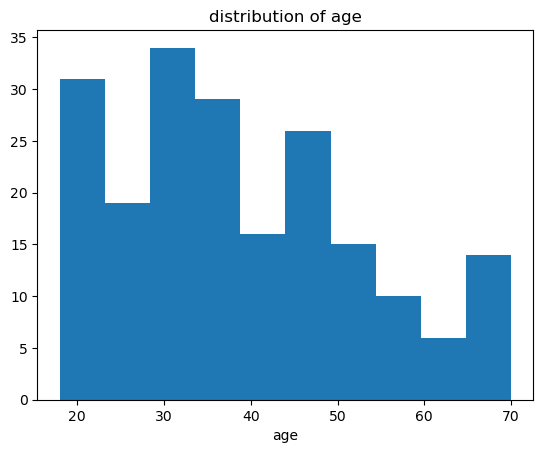

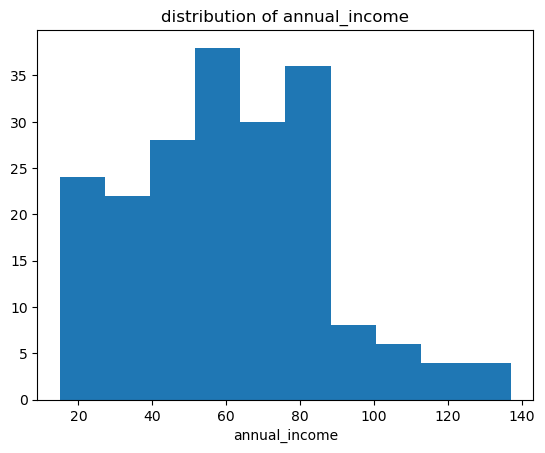

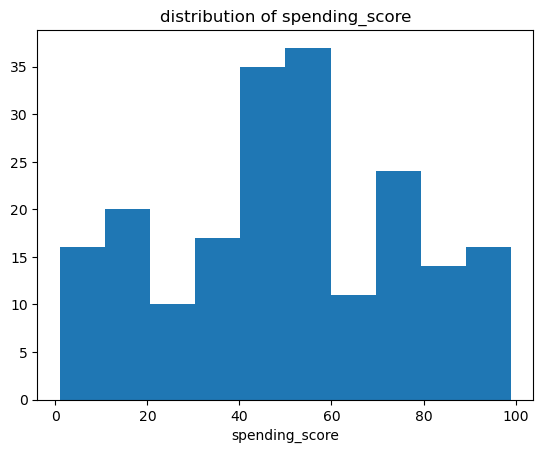

In [9]:
num_cols = ['age', 'annual_income', 'spending_score']

for col in num_cols:
    
    plt.hist(df[col])
    plt.title(f'distribution of {col}')
    plt.xlabel(f'{col}')
    plt.show()

In [10]:
df.isna().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

## Detect outliers sing IQR

25%, 50%, 75%, 100% quartiles

IQR = q3 - q1

upper_bound =  q3 + k * IQR

lower_bound = q1 - k * IQR

acceptable list of values for k: 1.5, 2, 3

In [11]:
q1, q3 = df['spending_score'].quantile([.25, .75])
q1,q3

(34.75, 73.0)

In [12]:
ss_iqr = q3 - q1
ss_iqr

38.25

In [13]:
k = 1.5

ss_upper = q3 + k * ss_iqr

ss_lower = q1 - k * ss_iqr

ss_upper, ss_lower

(130.375, -22.625)

In [14]:
df['spending_score'].min()

1

In [15]:
np.where(df['spending_score'] > ss_upper, 1, 0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [18]:
def upper_outlier_detecter(dataframe, column, k = 1.5):
    
    q1, q3 = dataframe[column].quantile([.25, .75])
    
    iqr = q3 - q1
    
    upper_bound = q3 + k *iqr
    
    return np.where(dataframe[column] > upper_bound, 1, 0)

In [19]:
my_list = ['age', 'annual_income']

for col in my_list:
    
    df[f'{col}_upper_outliers'] = upper_outlier_detecter(df, col)
    
df.head()   

,customer_id,gender,age,annual_income,spending_score,age_upper_outliers,annual_income_upper_outliers
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,0


In [20]:
df[['age_upper_outliers','annual_income_upper_outliers']].sum()

age_upper_outliers              0
annual_income_upper_outliers    2
dtype: int64

In [21]:
df[df['annual_income_upper_outliers'] == 1]

,customer_id,gender,age,annual_income,spending_score,age_upper_outliers,annual_income_upper_outliers
198,199,Male,32,137,18,0,1
199,200,Male,30,137,83,0,1


In [22]:
df['annual_income'].mean()

60.56